# Forecasting and Evaluating Property Values in Melbourne 
### By Michael Le

![Melbourne](Melbourne.png) 

This is my first Kaggle data-analysis and data-modelling project, employing various Machine Learning techniques including Supervised, Unsupervised Learning. Including exploration to predict house prices in Melbourne, leveraging a dataset spanning the years from 2016-2017. 

Note that the columns for Bedroom2 has changed to Bedroom and SellerG to Seller to avoid confusion due to typo errors.

In [182]:
#This is to add in raw button and  Python 3 compat
#Ensure the Notebook has added support for raw_input and %debug, as of 1.0. in Github
import sys
if sys.version_info[0] >= 3:
    raw_input = input

# Step 1. Loading the Dataset for the Melbourne House Prices

In [161]:
#Importing the Pandas and Numpy Package
import pandas as pd
import numpy as np

In [162]:
housing_pd = pd.read_csv("Desktop/melbourne_house_prices/Melbourne_housing_FULL.csv")
housing_pd.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [163]:
housing_pd.shape

(34857, 21)

# Step 2. Data Cleaning

## Re-order the columns of the data-frame

In [164]:
housing_pd = housing_pd[['Price','Suburb', 'Address', 'Rooms', 'Type','Method', 'Seller',
       'Date', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']]

## Check data info

In [165]:
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          27247 non-null  float64
 1   Suburb         34857 non-null  object 
 2   Address        34857 non-null  object 
 3   Rooms          34857 non-null  int64  
 4   Type           34857 non-null  object 
 5   Method         34857 non-null  object 
 6   Seller         34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom        26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

## Count how many null values for each of the columns in the housing dataset. 

In [166]:
housing_pd.isnull().sum()

Price             7610
Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
Seller               0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

## Check if there are any duplicated rows?

In [167]:
housing_pd.duplicated().any()

True

# Remove duplicated rows

In [168]:
housing_pd = housing_pd.drop_duplicates()
housing_pd

,Price,Suburb,Address,Rooms,Type,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,NaN,Abbotsford,68 Studley St,2,h,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,1480000.0,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,1035000.0,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,NaN,Abbotsford,18/659 Victoria St,3,u,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,1465000.0,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,1480000.0,Yarraville,13 Burns St,4,h,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,888000.0,Yarraville,29A Murray St,2,h,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,705000.0,Yarraville,147A Severn St,2,t,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,1140000.0,Yarraville,12/37 Stephen St,3,h,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


### One approach to cleaning data: Get rid off all rows containing NaN alphameric and numeric values.

In [169]:
housing_pd = housing_pd.dropna()
housing_pd.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          8887 non-null   float64
 1   Suburb         8887 non-null   object 
 2   Address        8887 non-null   object 
 3   Rooms          8887 non-null   int64  
 4   Type           8887 non-null   object 
 5   Method         8887 non-null   object 
 6   Seller         8887 non-null   object 
 7   Date           8887 non-null   object 
 8   Distance       8887 non-null   float64
 9   Postcode       8887 non-null   float64
 10  Bedroom        8887 non-null   float64
 11  Bathroom       8887 non-null   float64
 12  Car            8887 non-null   float64
 13  Landsize       8887 non-null   float64
 14  BuildingArea   8887 non-null   float64
 15  YearBuilt      8887 non-null   float64
 16  CouncilArea    8887 non-null   object 
 17  Lattitude      8887 non-null   float64
 18  Longtitude  

## May add other methods to cleaning data. Which would impact the results of the prediction on house prices in Melbourne. 

## Change the columns Bedroom, Bathroom, Car, YearBuilt and Property Count into the right metrics.

In [170]:

housing_pd['Bedroom'] = housing_pd['Bedroom'].astype(int)
housing_pd['Bathroom'] = housing_pd['Bathroom'].astype(int)
housing_pd['Car'] = housing_pd['Car'].astype(int)
housing_pd['YearBuilt'] = housing_pd['YearBuilt'].astype(int)
housing_pd['Propertycount'] = housing_pd['Propertycount'].astype(int)

C:\Users\Michael Le\AppData\Local\Temp\ipykernel_40248\1123500922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_pd['Bedroom'] = housing_pd['Bedroom'].astype(int)
C:\Users\Michael Le\AppData\Local\Temp\ipykernel_40248\1123500922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_pd['Bathroom'] = housing_pd['Bathroom'].astype(int)
C:\Users\Michael Le\AppData\Local\Temp\ipykernel_40248\1123500922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

## Check the info

In [171]:
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          8887 non-null   float64
 1   Suburb         8887 non-null   object 
 2   Address        8887 non-null   object 
 3   Rooms          8887 non-null   int64  
 4   Type           8887 non-null   object 
 5   Method         8887 non-null   object 
 6   Seller         8887 non-null   object 
 7   Date           8887 non-null   object 
 8   Distance       8887 non-null   float64
 9   Postcode       8887 non-null   float64
 10  Bedroom        8887 non-null   int32  
 11  Bathroom       8887 non-null   int32  
 12  Car            8887 non-null   int32  
 13  Landsize       8887 non-null   float64
 14  BuildingArea   8887 non-null   float64
 15  YearBuilt      8887 non-null   int32  
 16  CouncilArea    8887 non-null   object 
 17  Lattitude      8887 non-null   float64
 18  Longtitude  

## Refer to https://stackoverflow.com/questions/15891038/change-column-type-in-pandas

## Check the head of the cleaned dataframe for the Melbourne housing data

In [172]:
housing_pd.head()

,Price,Suburb,Address,Rooms,Type,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,1035000.0,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,...,1,0,156.0,79.0,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
4,1465000.0,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,...,2,0,134.0,150.0,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
6,1600000.0,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,...,1,2,120.0,142.0,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019
11,1876000.0,Abbotsford,124 Yarra St,3,h,S,Nelson,7/05/2016,2.5,3067.0,...,2,0,245.0,210.0,1910,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019
14,1636000.0,Abbotsford,98 Charles St,2,h,S,Nelson,8/10/2016,2.5,3067.0,...,1,2,256.0,107.0,1890,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019


## Getting rid of columns we do not need (might be useful for Step 3.)

In [173]:
housing_pd = housing_pd.drop(['Address','Date'],axis=1)

#Check the head to see if we got rid of Address and Data
housing_pd.head()

,Price,Suburb,Rooms,Type,Method,Seller,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,1035000.0,Abbotsford,2,h,S,Biggin,2.5,3067.0,2,1,0,156.0,79.0,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
4,1465000.0,Abbotsford,3,h,SP,Biggin,2.5,3067.0,3,2,0,134.0,150.0,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
6,1600000.0,Abbotsford,4,h,VB,Nelson,2.5,3067.0,3,1,2,120.0,142.0,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019
11,1876000.0,Abbotsford,3,h,S,Nelson,2.5,3067.0,4,2,0,245.0,210.0,1910,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019
14,1636000.0,Abbotsford,2,h,S,Nelson,2.5,3067.0,2,1,2,256.0,107.0,1890,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019


# Step 3. Data Exploration and analysis 

In [174]:
from sklearn.model_selection import train_test_split
y = housing_pd["Price"]
X = housing_pd.drop(["Price"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [175]:
train_data = X_train.join(y_train)
# Remove duplicate columns
train_data = train_data.loc[:, ~train_data.columns.duplicated()]
train_data

,Suburb,Rooms,Type,Method,Seller,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price
21848,Eltham,3,h,VB,Morrison,18.0,3095.0,3,2,2,868.0,135.0,1980,Banyule City Council,-37.70659,145.16345,Eastern Metropolitan,6990,810000.0
178,Albert Park,4,h,S,Marshall,3.3,3206.0,4,2,1,330.0,207.0,1910,Port Phillip City Council,-37.84770,144.95580,Southern Metropolitan,3280,4735000.0
34037,Brunswick,2,h,SP,Jellis,5.2,3056.0,2,1,2,398.0,107.0,1890,Moreland City Council,-37.76032,144.95981,Northern Metropolitan,11918,1150000.0
30593,Mill Park,4,h,S,HAR,17.9,3082.0,3,2,1,620.0,135.0,1980,Whittlesea City Council,-37.65807,145.06132,Northern Metropolitan,10529,660000.0
3662,Doncaster,4,t,S,Fletchers,13.9,3108.0,4,2,2,182.0,160.0,1998,Manningham City Council,-37.78880,145.13800,Eastern Metropolitan,9028,985000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11091,Brunswick East,3,t,S,Nelson,4.5,3057.0,3,2,1,0.0,133.0,2014,Moreland City Council,-37.77400,144.97310,Northern Metropolitan,5533,1010000.0
100,Airport West,3,h,S,Barry,13.5,3042.0,3,1,2,971.0,113.0,1960,Moonee Valley City Council,-37.71860,144.87600,Western Metropolitan,3464,830000.0
1059,Balwyn North,4,h,PI,RW,9.2,3104.0,4,3,2,1274.0,275.0,1970,Boroondara City Council,-37.78220,145.09070,Southern Metropolitan,7809,2130000.0
19693,Sunshine West,3,h,S,Barry,10.5,3020.0,3,1,0,694.0,113.6,1950,Brimbank City Council,-37.78871,144.81369,Western Metropolitan,6763,695000.0


## Histogram of the individual features 

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>,
        <Axes: title={'center': 'Bedroom'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

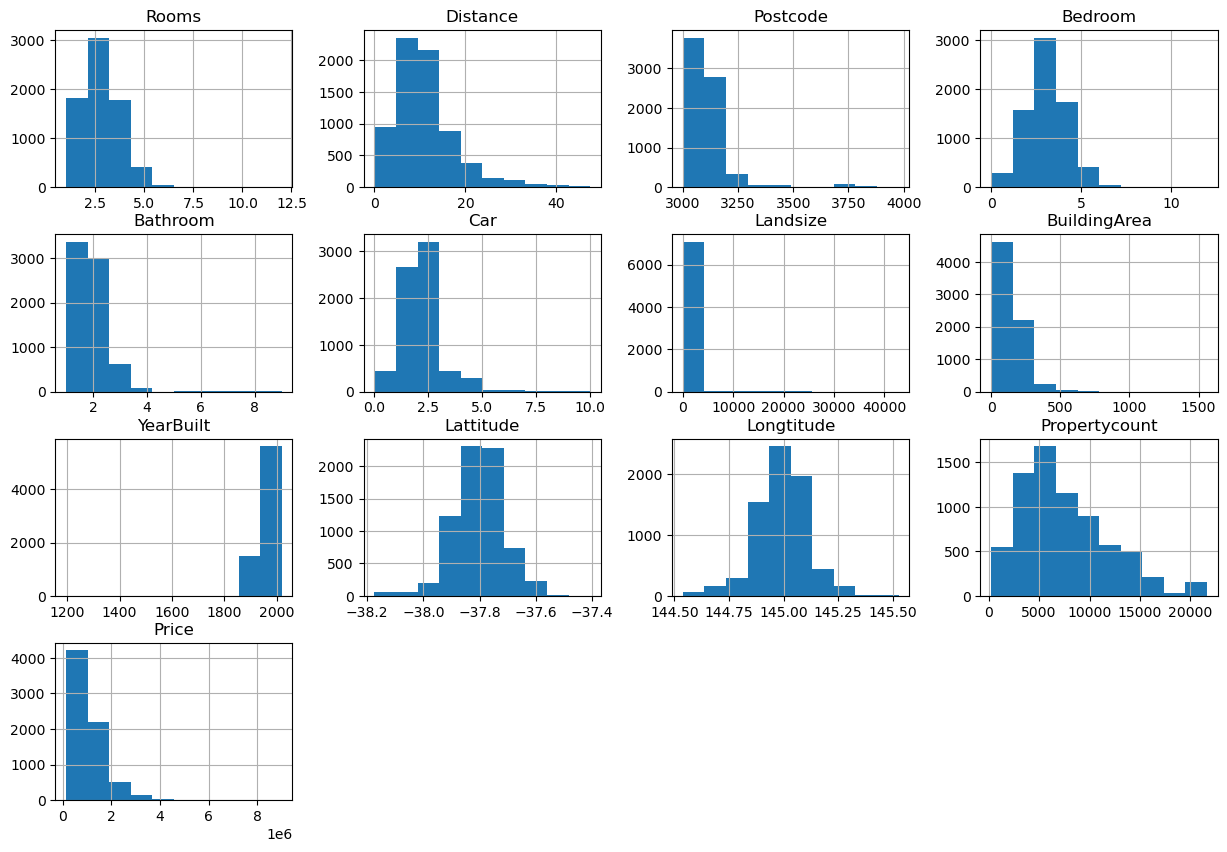

In [176]:
train_data.hist(figsize=(15,10))

## Plotting the heatmap for the individual features

<Axes: >

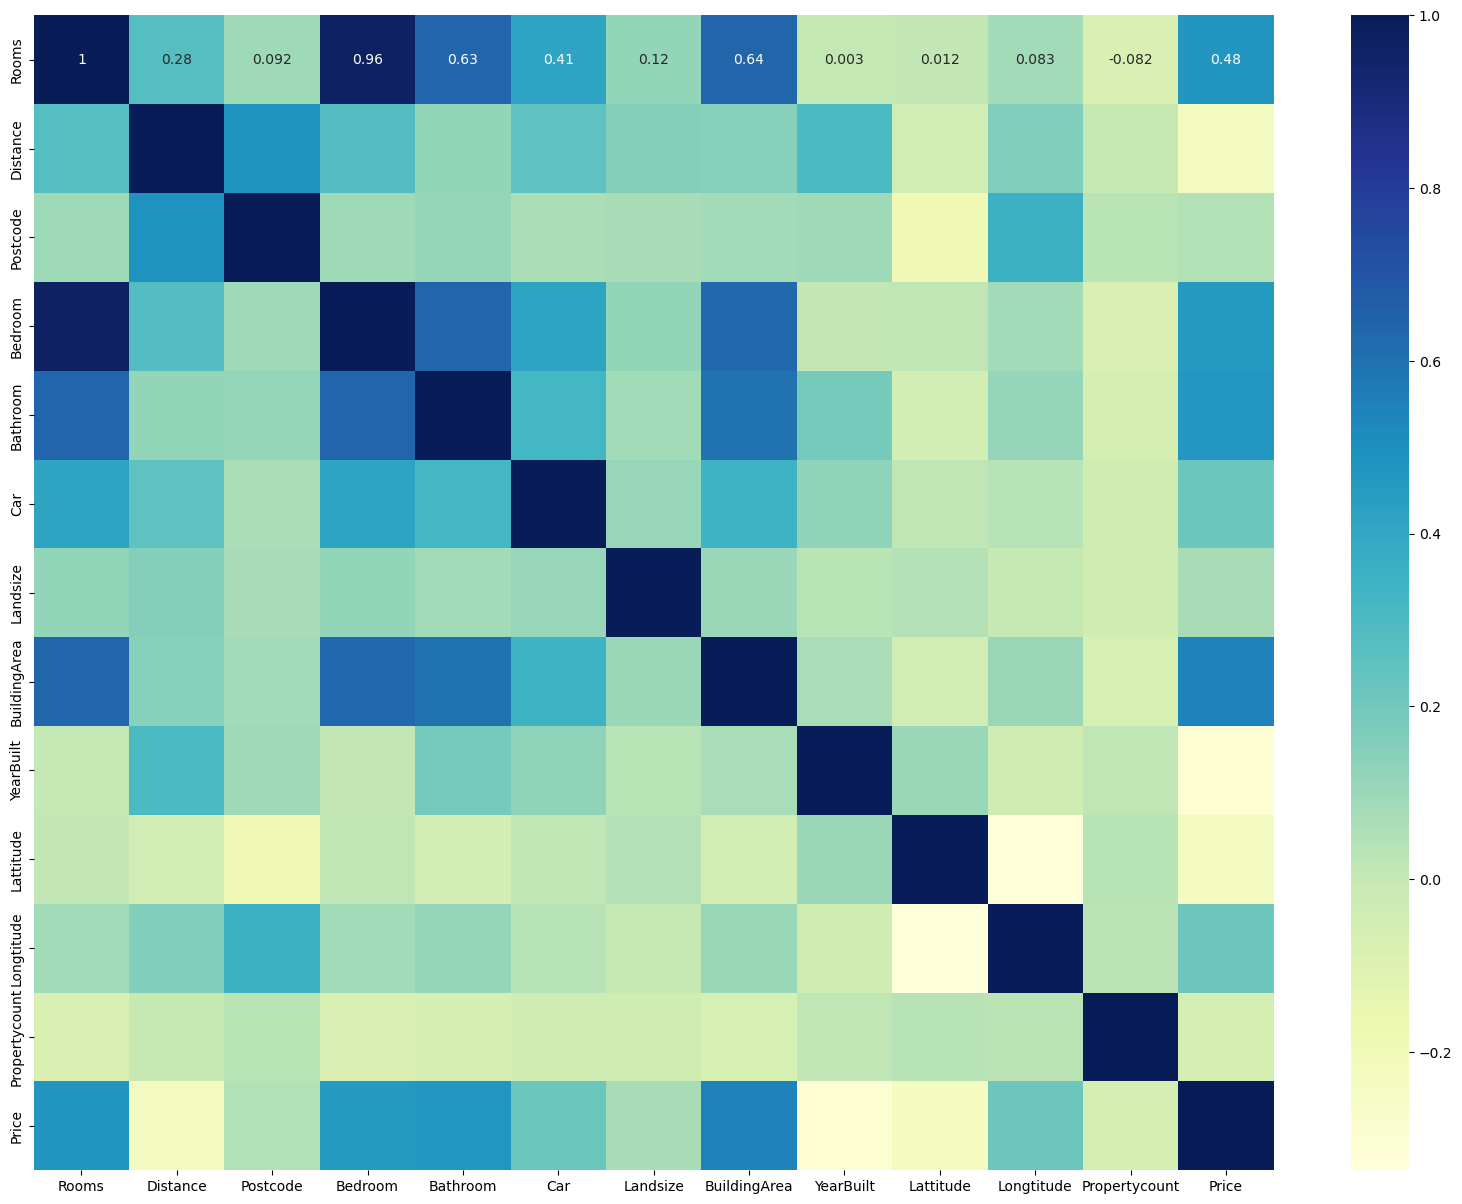

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
sns.heatmap(train_data.drop(['Regionname', 'Suburb','Seller','CouncilArea','Type','Method'],axis=1).corr(),annot=True,cmap='YlGnBu')

## Scatter plot of all the houses in Melbourne based on Price

<Axes: xlabel='Lattitude', ylabel='Longtitude'>

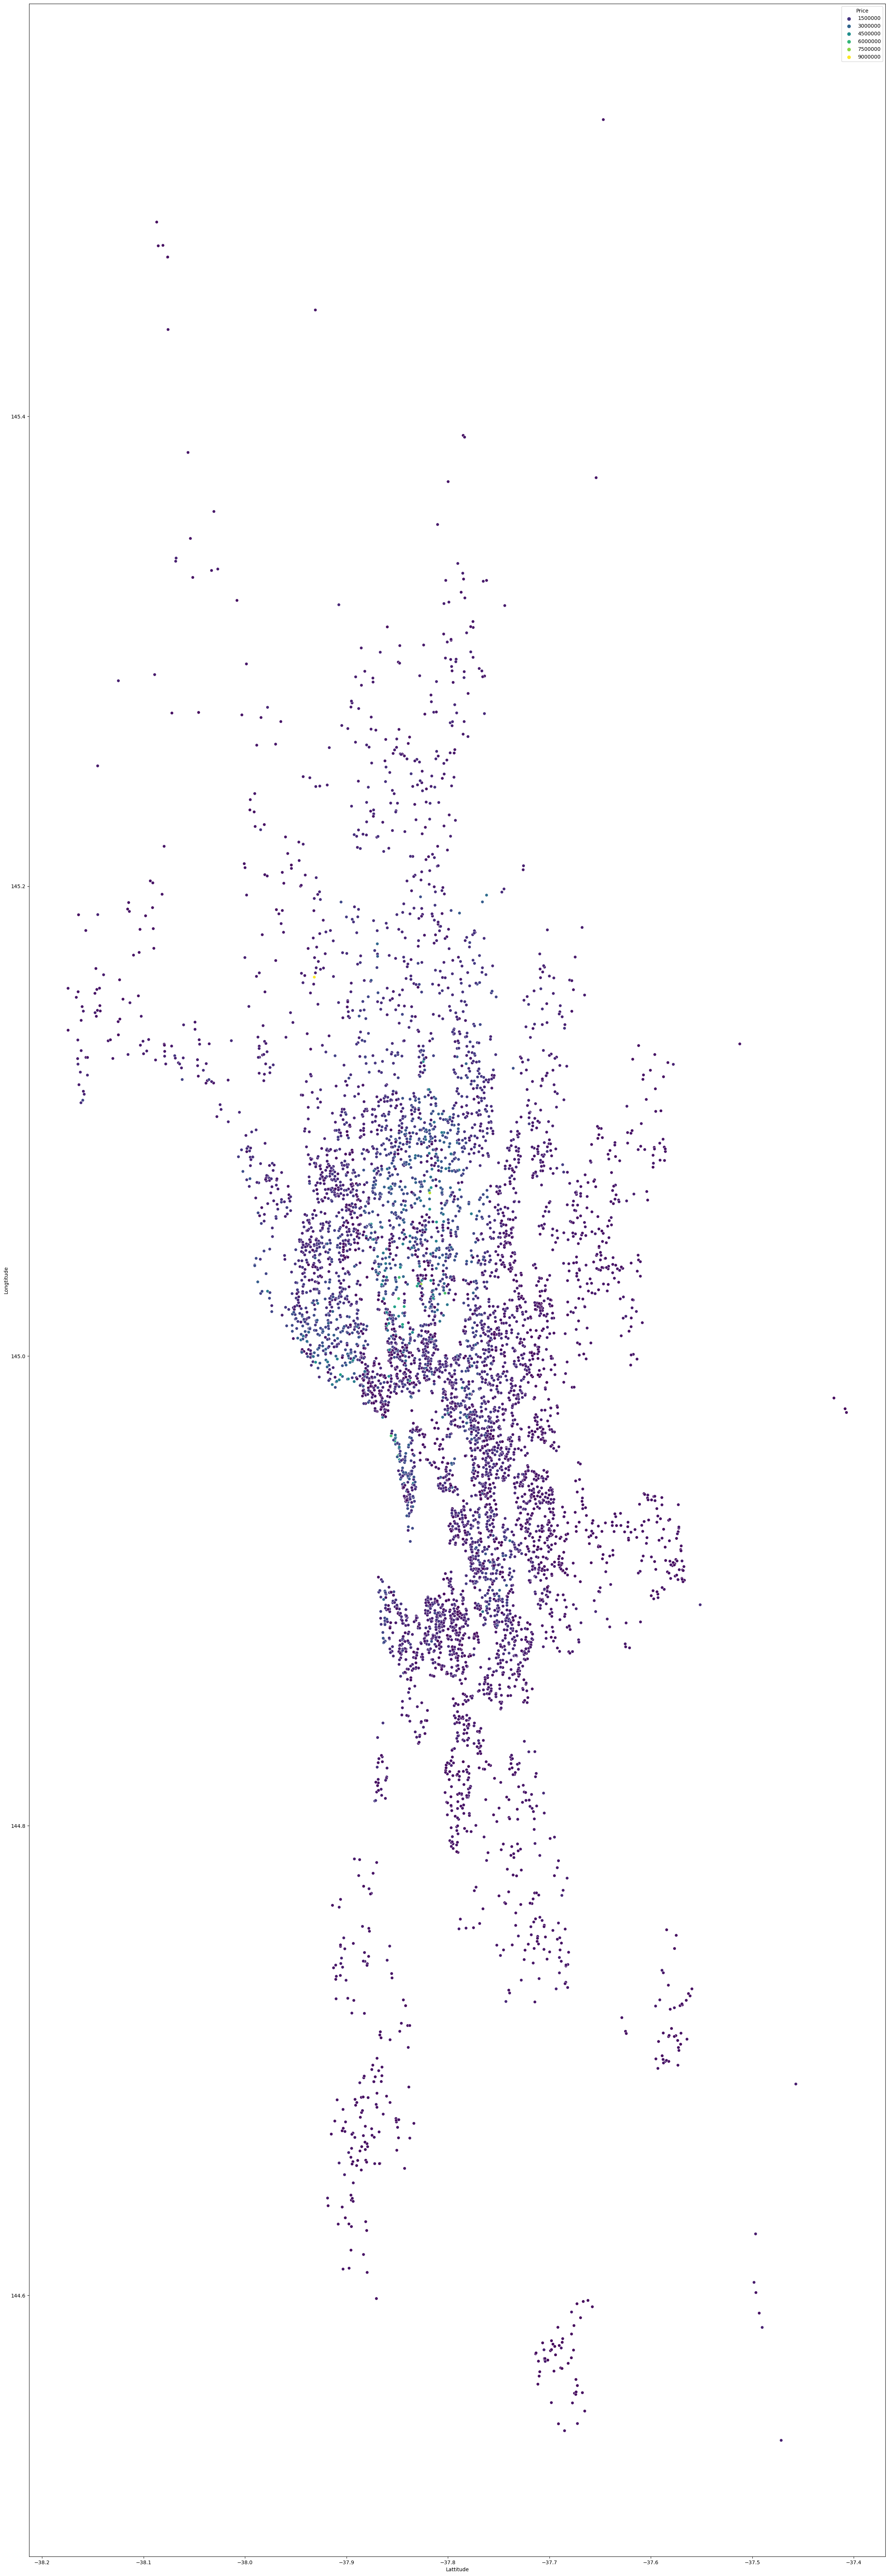

In [178]:
plt.figure(figsize=(30,90))
sns.scatterplot(x = "Lattitude", y = "Longtitude" ,data=train_data,hue="Price",palette = "viridis" )

In [179]:
# We add 1 inside for each log function to ensure our numeric values are valid
train_data['total_rooms'] = np.log(train_data['Rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['Bedroom'] + 1)
train_data['total_distance'] = np.log(train_data['Distance'] + 1)
train_data['total_car_spots'] = np.log(train_data['Car'] + 1)
train_data['total_Landsize'] = np.log(train_data['Landsize'] + 1)
train_data['total_Building_Area'] = np.log(train_data['BuildingArea'] + 1)
train_data['total_Property_count'] = np.log(train_data['Propertycount'] + 1)
train_data['total_Price'] = np.log(train_data['Price'] + 1)


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>,
        <Axes: title={'center': 'Bedroom'}>,
        <Axes: title={'center': 'Bathroom'}>],
       [<Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>],
       [<Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'total_distance'}>,
        <Axes: title={'center': 'total_car_spots'}>,
        <Axes: title={'center': 'total_Landsize'}>,
        <Axes: title={'center': 'total_Building_Area'}>,
        <Axes: title={'center': 'total_Property_count'}>],
       [<Axes: title={'c

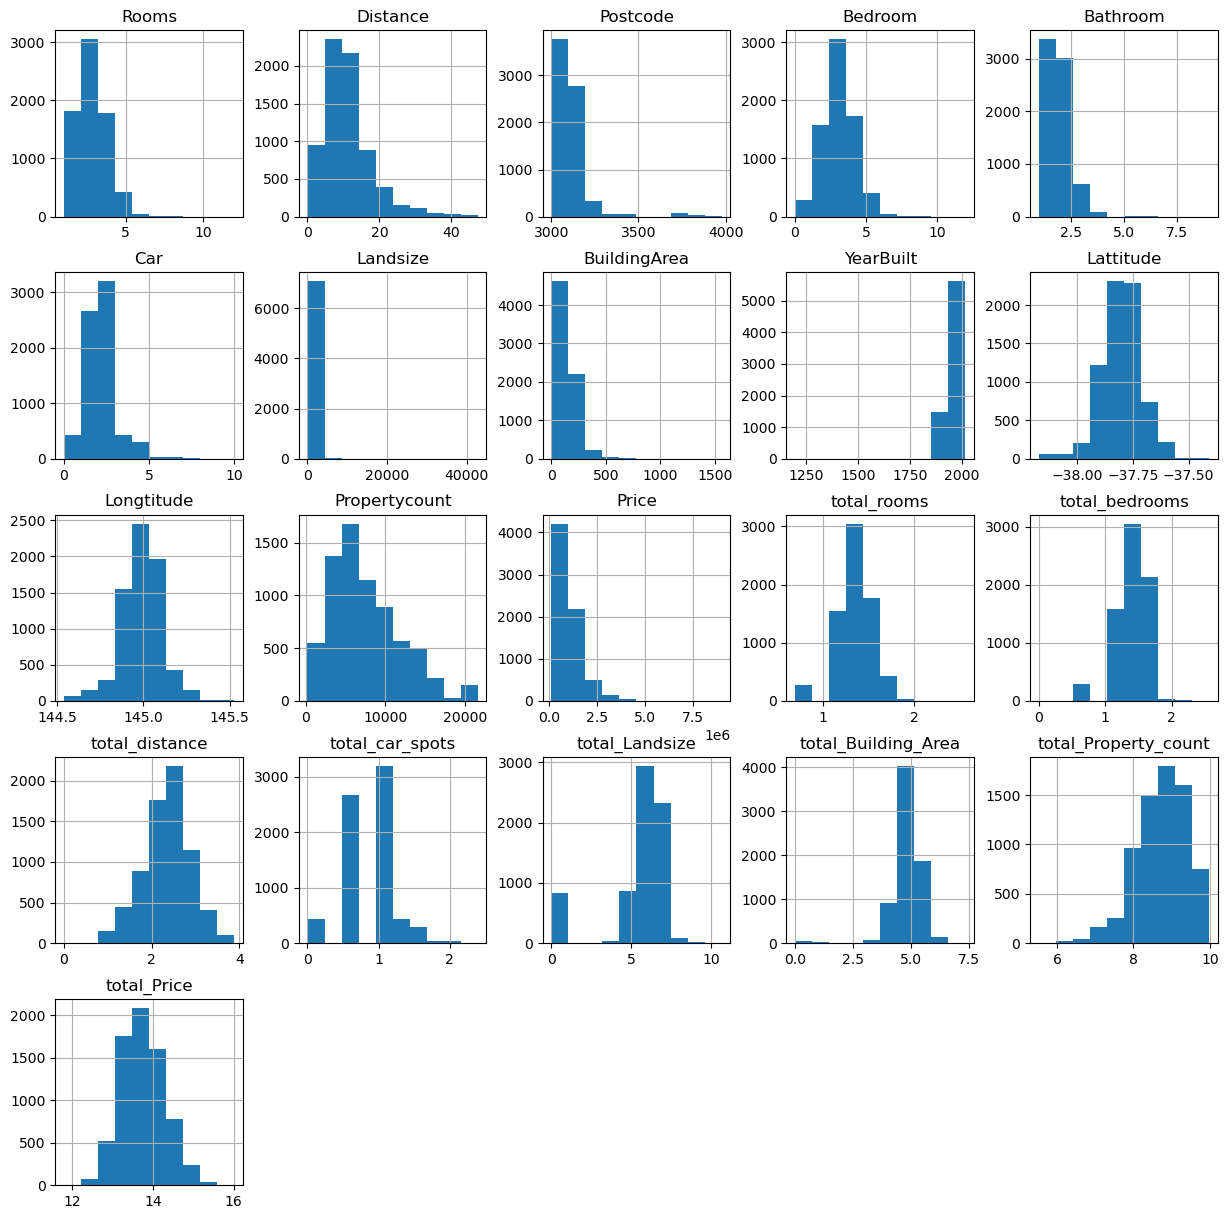

In [180]:
train_data.hist(figsize=(15,15))

# Step 4. Finalise the current data-frame 

In [101]:
housing_pd['Regionname'].value_counts()

Regionname
Southern Metropolitan         2707
Northern Metropolitan         2612
Western Metropolitan          2059
Eastern Metropolitan           982
South-Eastern Metropolitan     371
Northern Victoria               62
Eastern Victoria                51
Western Victoria                43
Name: count, dtype: int64

In [102]:
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd),random_state = 1)
housing_pd_shuffled

,Price,Suburb,Rooms,Type,Method,Seller,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
17359,740000.0,Thomastown,3,h,S,Harcourts,15.3,3074.0,3,1,2,727.0,109.0,1952,Whittlesea City Council,-37.67873,145.01878,Northern Metropolitan,7955
17097,572000.0,Lalor,3,h,S,Love,16.3,3075.0,3,1,2,640.0,140.0,1975,Whittlesea City Council,-37.65910,145.00549,Northern Metropolitan,8279
5265,3225000.0,Hawthorn,4,h,S,Jellis,4.6,3122.0,4,2,2,665.0,220.0,1890,Boroondara City Council,-37.81400,145.01750,Southern Metropolitan,11308
21286,626000.0,Jacana,3,h,S,Raine,14.0,3047.0,3,1,2,622.0,87.0,1960,Hume City Council,-37.68908,144.91160,Northern Metropolitan,851
9450,850000.0,Spotswood,4,h,VB,RT,7.7,3015.0,4,2,0,389.0,158.0,1990,Hobsons Bay City Council,-37.82840,144.88610,Western Metropolitan,1223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,512000.0,Richmond,2,u,S,Marshall,2.6,3121.0,2,1,1,0.0,61.0,1970,Yarra City Council,-37.81980,144.99600,Northern Metropolitan,14949
29972,420000.0,Werribee,3,h,S,Barry,14.7,3030.0,3,2,2,341.0,106.0,1995,Wyndham City Council,-37.88098,144.65754,Western Metropolitan,16166
2848,3550000.0,Canterbury,5,h,VB,RT,9.0,3126.0,5,4,4,684.0,427.0,2013,Boroondara City Council,-37.83200,145.08530,Southern Metropolitan,3265
16744,460000.0,Brunswick West,2,u,S,Ray,5.2,3055.0,2,1,1,54.0,60.0,1970,Moreland City Council,-37.75948,144.94758,Northern Metropolitan,7082


## Catagorize the Region Name into categorical data (given numeric values)

In [103]:
pd.get_dummies(housing_pd_shuffled['Regionname'], dtype=float).head() 

,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
17359,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17097,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5265,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9450,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## We do the same for Council Area, Suburb, Type, Method, Seller, Type, Postcode and Method

In [104]:
pd.get_dummies(housing_pd_shuffled['CouncilArea'], dtype=float).head()

,Banyule City Council,Bayside City Council,Boroondara City Council,Brimbank City Council,Cardinia Shire Council,Casey City Council,Darebin City Council,Frankston City Council,Glen Eira City Council,Greater Dandenong City Council,...,Moorabool Shire Council,Moreland City Council,Nillumbik Shire Council,Port Phillip City Council,Stonnington City Council,Whitehorse City Council,Whittlesea City Council,Wyndham City Council,Yarra City Council,Yarra Ranges Shire Council
17359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5265,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
pd.get_dummies(housing_pd_shuffled['Suburb'], dtype=float).head()

,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,...,Whittlesea,Williams Landing,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarra Glen,Yarraville
17359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
pd.get_dummies(housing_pd_shuffled['Seller'], dtype=float).head()

,@Realty,Abercromby's,Ace,Alexkarbon,Allens,Anderson,Appleby,Aquire,Area,Ascend,...,buyMyplace,hockingstuart,hockingstuart/Advantage,hockingstuart/Biggin,hockingstuart/Village,hockingstuart/hockingstuart,iOne,iProperty,iSell,iTRAK
17359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
pd.get_dummies(housing_pd_shuffled['Type'], dtype=float).head()

,h,t,u
17359,1.0,0.0,0.0
17097,1.0,0.0,0.0
5265,1.0,0.0,0.0
21286,1.0,0.0,0.0
9450,1.0,0.0,0.0


In [108]:
pd.get_dummies(housing_pd_shuffled['Method'], dtype=float).head()

,PI,S,SA,SP,VB
17359,0.0,1.0,0.0,0.0,0.0
17097,0.0,1.0,0.0,0.0,0.0
5265,0.0,1.0,0.0,0.0,0.0
21286,0.0,1.0,0.0,0.0,0.0
9450,0.0,0.0,0.0,0.0,1.0


In [109]:
pd.get_dummies(housing_pd_shuffled['Postcode'], dtype=int).head()

,3000.0,3002.0,3003.0,3006.0,3011.0,3012.0,3013.0,3015.0,3016.0,3018.0,...,3803.0,3805.0,3806.0,3807.0,3808.0,3809.0,3810.0,3910.0,3976.0,3977.0
17359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9450,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## We then drop the columns for Region Name, Council Area, Seller, Suburb and PostCode

In [110]:
housing_pd_shuffled.drop('Regionname',axis=1).head()

,Price,Suburb,Rooms,Type,Method,Seller,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount
17359,740000.0,Thomastown,3,h,S,Harcourts,15.3,3074.0,3,1,2,727.0,109.0,1952,Whittlesea City Council,-37.67873,145.01878,7955
17097,572000.0,Lalor,3,h,S,Love,16.3,3075.0,3,1,2,640.0,140.0,1975,Whittlesea City Council,-37.65910,145.00549,8279
5265,3225000.0,Hawthorn,4,h,S,Jellis,4.6,3122.0,4,2,2,665.0,220.0,1890,Boroondara City Council,-37.81400,145.01750,11308
21286,626000.0,Jacana,3,h,S,Raine,14.0,3047.0,3,1,2,622.0,87.0,1960,Hume City Council,-37.68908,144.91160,851
9450,850000.0,Spotswood,4,h,VB,RT,7.7,3015.0,4,2,0,389.0,158.0,1990,Hobsons Bay City Council,-37.82840,144.88610,1223


In [111]:
housing_pd_shuffled.drop('CouncilArea',axis=1).head()

,Price,Suburb,Rooms,Type,Method,Seller,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
17359,740000.0,Thomastown,3,h,S,Harcourts,15.3,3074.0,3,1,2,727.0,109.0,1952,-37.67873,145.01878,Northern Metropolitan,7955
17097,572000.0,Lalor,3,h,S,Love,16.3,3075.0,3,1,2,640.0,140.0,1975,-37.65910,145.00549,Northern Metropolitan,8279
5265,3225000.0,Hawthorn,4,h,S,Jellis,4.6,3122.0,4,2,2,665.0,220.0,1890,-37.81400,145.01750,Southern Metropolitan,11308
21286,626000.0,Jacana,3,h,S,Raine,14.0,3047.0,3,1,2,622.0,87.0,1960,-37.68908,144.91160,Northern Metropolitan,851
9450,850000.0,Spotswood,4,h,VB,RT,7.7,3015.0,4,2,0,389.0,158.0,1990,-37.82840,144.88610,Western Metropolitan,1223


In [112]:
housing_pd_shuffled.drop('Suburb',axis=1).head()

,Price,Rooms,Type,Method,Seller,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
17359,740000.0,3,h,S,Harcourts,15.3,3074.0,3,1,2,727.0,109.0,1952,Whittlesea City Council,-37.67873,145.01878,Northern Metropolitan,7955
17097,572000.0,3,h,S,Love,16.3,3075.0,3,1,2,640.0,140.0,1975,Whittlesea City Council,-37.65910,145.00549,Northern Metropolitan,8279
5265,3225000.0,4,h,S,Jellis,4.6,3122.0,4,2,2,665.0,220.0,1890,Boroondara City Council,-37.81400,145.01750,Southern Metropolitan,11308
21286,626000.0,3,h,S,Raine,14.0,3047.0,3,1,2,622.0,87.0,1960,Hume City Council,-37.68908,144.91160,Northern Metropolitan,851
9450,850000.0,4,h,VB,RT,7.7,3015.0,4,2,0,389.0,158.0,1990,Hobsons Bay City Council,-37.82840,144.88610,Western Metropolitan,1223


In [113]:
housing_pd_shuffled.drop('Seller',axis=1).head()

,Price,Suburb,Rooms,Type,Method,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
17359,740000.0,Thomastown,3,h,S,15.3,3074.0,3,1,2,727.0,109.0,1952,Whittlesea City Council,-37.67873,145.01878,Northern Metropolitan,7955
17097,572000.0,Lalor,3,h,S,16.3,3075.0,3,1,2,640.0,140.0,1975,Whittlesea City Council,-37.65910,145.00549,Northern Metropolitan,8279
5265,3225000.0,Hawthorn,4,h,S,4.6,3122.0,4,2,2,665.0,220.0,1890,Boroondara City Council,-37.81400,145.01750,Southern Metropolitan,11308
21286,626000.0,Jacana,3,h,S,14.0,3047.0,3,1,2,622.0,87.0,1960,Hume City Council,-37.68908,144.91160,Northern Metropolitan,851
9450,850000.0,Spotswood,4,h,VB,7.7,3015.0,4,2,0,389.0,158.0,1990,Hobsons Bay City Council,-37.82840,144.88610,Western Metropolitan,1223


In [114]:
housing_pd_shuffled.drop('Type',axis=1).head()

,Price,Suburb,Rooms,Method,Seller,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
17359,740000.0,Thomastown,3,S,Harcourts,15.3,3074.0,3,1,2,727.0,109.0,1952,Whittlesea City Council,-37.67873,145.01878,Northern Metropolitan,7955
17097,572000.0,Lalor,3,S,Love,16.3,3075.0,3,1,2,640.0,140.0,1975,Whittlesea City Council,-37.65910,145.00549,Northern Metropolitan,8279
5265,3225000.0,Hawthorn,4,S,Jellis,4.6,3122.0,4,2,2,665.0,220.0,1890,Boroondara City Council,-37.81400,145.01750,Southern Metropolitan,11308
21286,626000.0,Jacana,3,S,Raine,14.0,3047.0,3,1,2,622.0,87.0,1960,Hume City Council,-37.68908,144.91160,Northern Metropolitan,851
9450,850000.0,Spotswood,4,VB,RT,7.7,3015.0,4,2,0,389.0,158.0,1990,Hobsons Bay City Council,-37.82840,144.88610,Western Metropolitan,1223


In [115]:
housing_pd_shuffled.drop('Method',axis=1).head()

,Price,Suburb,Rooms,Type,Seller,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
17359,740000.0,Thomastown,3,h,Harcourts,15.3,3074.0,3,1,2,727.0,109.0,1952,Whittlesea City Council,-37.67873,145.01878,Northern Metropolitan,7955
17097,572000.0,Lalor,3,h,Love,16.3,3075.0,3,1,2,640.0,140.0,1975,Whittlesea City Council,-37.65910,145.00549,Northern Metropolitan,8279
5265,3225000.0,Hawthorn,4,h,Jellis,4.6,3122.0,4,2,2,665.0,220.0,1890,Boroondara City Council,-37.81400,145.01750,Southern Metropolitan,11308
21286,626000.0,Jacana,3,h,Raine,14.0,3047.0,3,1,2,622.0,87.0,1960,Hume City Council,-37.68908,144.91160,Northern Metropolitan,851
9450,850000.0,Spotswood,4,h,RT,7.7,3015.0,4,2,0,389.0,158.0,1990,Hobsons Bay City Council,-37.82840,144.88610,Western Metropolitan,1223


In [116]:
housing_pd_shuffled.drop('Postcode',axis=1).head()

,Price,Suburb,Rooms,Type,Method,Seller,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
17359,740000.0,Thomastown,3,h,S,Harcourts,15.3,3,1,2,727.0,109.0,1952,Whittlesea City Council,-37.67873,145.01878,Northern Metropolitan,7955
17097,572000.0,Lalor,3,h,S,Love,16.3,3,1,2,640.0,140.0,1975,Whittlesea City Council,-37.65910,145.00549,Northern Metropolitan,8279
5265,3225000.0,Hawthorn,4,h,S,Jellis,4.6,4,2,2,665.0,220.0,1890,Boroondara City Council,-37.81400,145.01750,Southern Metropolitan,11308
21286,626000.0,Jacana,3,h,S,Raine,14.0,3,1,2,622.0,87.0,1960,Hume City Council,-37.68908,144.91160,Northern Metropolitan,851
9450,850000.0,Spotswood,4,h,VB,RT,7.7,4,2,0,389.0,158.0,1990,Hobsons Bay City Council,-37.82840,144.88610,Western Metropolitan,1223


## Here we are creating our final dataframe for the house in Melbourne dataset 

In [117]:
housing_pd_rn = pd.concat([housing_pd_shuffled.drop('Regionname',axis=1),pd.get_dummies(housing_pd_shuffled['Regionname'],dtype=float)], axis=1)
housing_pd_ca = pd.concat([housing_pd_shuffled.drop('CouncilArea',axis=1),pd.get_dummies(housing_pd_shuffled['CouncilArea'],dtype=float)], axis=1)
housing_pd_s = pd.concat([housing_pd_shuffled.drop('Suburb',axis=1),pd.get_dummies(housing_pd_shuffled['Suburb'],dtype=float)], axis=1)
housing_pd_sg = pd.concat([housing_pd_shuffled.drop('Seller',axis=1),pd.get_dummies(housing_pd_shuffled['Seller'],dtype=float)], axis=1)
housing_pd_t = pd.concat([housing_pd_shuffled.drop('Type',axis=1),pd.get_dummies(housing_pd_shuffled['Type'],dtype=float)], axis=1)
housing_pd_m = pd.concat([housing_pd_shuffled.drop('Method',axis=1),pd.get_dummies(housing_pd_shuffled['Method'],dtype=float)], axis=1)
housing_pd_p = pd.concat([housing_pd_shuffled.drop('Postcode',axis=1),pd.get_dummies(housing_pd_shuffled['Postcode'],dtype=float)], axis=1)
housing_pd_rn_ca = pd.concat([housing_pd_rn,housing_pd_ca], axis=1)
housing_pd_s_sg = pd.concat([housing_pd_s,housing_pd_sg], axis=1)
housing_pd_t_m = pd.concat([housing_pd_t,housing_pd_m], axis=1)
housing_pd_t_m_p = pd.concat([housing_pd_t_m,housing_pd_p], axis=1)


In [118]:
housing_pd_final_rn_ca_s_sg = pd.concat([housing_pd_rn_ca ,housing_pd_s_sg], axis=1)
housing_pd_final = pd.concat([housing_pd_final_rn_ca_s_sg ,housing_pd_t_m_p], axis=1)
housing_pd_final = housing_pd_final.drop(['Regionname','CouncilArea','Suburb','Type','Method','Seller','Postcode'],axis=1)
housing_pd_final.head()

,Price,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,3803.0,3805.0,3806.0,3807.0,3808.0,3809.0,3810.0,3910.0,3976.0,3977.0
17359,740000.0,3,15.3,3,1,2,727.0,109.0,1952,-37.67873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17097,572000.0,3,16.3,3,1,2,640.0,140.0,1975,-37.65910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5265,3225000.0,4,4.6,4,2,2,665.0,220.0,1890,-37.81400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21286,626000.0,3,14.0,3,1,2,622.0,87.0,1960,-37.68908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9450,850000.0,4,7.7,4,2,0,389.0,158.0,1990,-37.82840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Checking the shape and types of the final Melbourne housing data-frame 

In [119]:
housing_pd_final.dtypes

Price       float64
Rooms         int64
Distance    float64
Bedroom       int32
Bathroom      int32
             ...   
3809.0      float64
3810.0      float64
3910.0      float64
3976.0      float64
3977.0      float64
Length: 892, dtype: object

In [120]:
housing_pd_final.shape

(8887, 892)

In [121]:
# Remove duplicate columns
housing_pd_final = housing_pd_final.loc[:, ~housing_pd_final.columns.duplicated()]
housing_pd_final

,Price,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,3803.0,3805.0,3806.0,3807.0,3808.0,3809.0,3810.0,3910.0,3976.0,3977.0
17359,740000.0,3,15.3,3,1,2,727.0,109.0,1952,-37.67873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17097,572000.0,3,16.3,3,1,2,640.0,140.0,1975,-37.65910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5265,3225000.0,4,4.6,4,2,2,665.0,220.0,1890,-37.81400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21286,626000.0,3,14.0,3,1,2,622.0,87.0,1960,-37.68908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9450,850000.0,4,7.7,4,2,0,389.0,158.0,1990,-37.82840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,512000.0,2,2.6,2,1,1,0.0,61.0,1970,-37.81980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29972,420000.0,3,14.7,3,2,2,341.0,106.0,1995,-37.88098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2848,3550000.0,5,9.0,5,4,4,684.0,427.0,2013,-37.83200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16744,460000.0,2,5.2,2,1,1,54.0,60.0,1970,-37.75948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
housing_pd_final.columns.values

array(['Price', 'Rooms', 'Distance', 'Bedroom', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount', 'Eastern Metropolitan', 'Eastern Victoria',
       'Northern Metropolitan', 'Northern Victoria',
       'South-Eastern Metropolitan', 'Southern Metropolitan',
       'Western Metropolitan', 'Western Victoria', 'Banyule City Council',
       'Bayside City Council', 'Boroondara City Council',
       'Brimbank City Council', 'Cardinia Shire Council',
       'Casey City Council', 'Darebin City Council',
       'Frankston City Council', 'Glen Eira City Council',
       'Greater Dandenong City Council', 'Hobsons Bay City Council',
       'Hume City Council', 'Kingston City Council', 'Knox City Council',
       'Macedon Ranges Shire Council', 'Manningham City Council',
       'Maribyrnong City Council', 'Maroondah City Council',
       'Melbourne City Council', 'Melton City Council',
       'Mitchell Shire Council', 'Monash City 

# Step 5. Spliting the final housing dataframe for the training, testing and validation data.

In [123]:
# You can train, for demonstration purposes we use about 7000 to train, the next 900 to test and the rest used for testing data
# These results will vary depending on the rows you imputed or cleaned in Step 2.
train_pd,test_pd,val_pd = housing_pd_final[:7000],housing_pd_final[7000:7900],housing_pd_final[7900:]
len(train_pd), len(test_pd),len(val_pd)

(7000, 900, 987)

## Compute our training data

In [124]:
X_train,y_train = train_pd.to_numpy()[:,1:], train_pd.to_numpy()[:,0]
y_train

array([ 740000.,  572000., 3225000., ...,  750000.,  750000.,  580000.])

In [125]:
y_train.shape

(7000,)

In [126]:
X_train.shape

(7000, 818)

## Compute our testing and validation data

In [127]:
X_test,y_test= test_pd.to_numpy()[:,1:], test_pd.to_numpy()[:,0]
X_val,y_val = val_pd.to_numpy()[:,1:], val_pd.to_numpy()[:,0]
X_test.shape,y_test.shape,X_val.shape,y_val.shape

((900, 818), (900,), (987, 818), (987,))

## Scaling and transforming our data

In [128]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scalar = StandardScaler().fit(X_train[:,1:12])

def preprocessor(X):
    A = np.copy(X)
    A[:,1:12] = scalar.transform(A[:,1:12])
    return A

X_train, X_val, X_test = preprocessor(X_train),preprocessor(X_val),preprocessor(X_test)


In [129]:
X_train.shape,X_val.shape,X_test.shape

((7000, 818), (987, 818), (900, 818))

# Step 6. Applying Machine Learning Techniques to compute the Mean Square Errors and Score Metrics

## Compute the mean squared error using the Linear Regression Model

### Refer from this link https://encord.com/glossary/mean-square-error-mse/#:~:text=By%20squaring%20the%20differences%2C%20the,values%2C%20reflecting%20better%20overall%20performance.

In [130]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# This seems to be a good fit for the model
# NOTE: If the MSE values are large the model will likely to appear to be overfitted
lm = LinearRegression().fit(X_train,y_train)
mse(lm.predict(X_train),y_train,squared=False), mse(lm.predict(X_val),y_val,squared=False)

(340686.8432383325, 2353038846011496.5)

## Check the regression scores for the testing and training data.

In [131]:
lm.score(X_test,y_test)

-1.5075764864513472e+18

In [132]:
lm.score(X_train,y_train)

0.7489109770599006

### In this case the training data performs significantly better than the testing data, there is overfitting for the regression model.

## Compute the mean square error using KNN (K-Nearest Neighbour), Where K is any Natural Number (i.e. 1,2,..etc)

In [133]:
from sklearn.neighbors import KNeighborsRegressor

# Can set the n_neighbors for 12 for now.
# To note: As K increases, the KNN fits a smoother curve to the data. This is because a higher value of
# K reduces the edginess by taking more data into account, thus reducing the overall complexity and flexibility of the model.

#NOTE: If my MSE validation is lower than the MSE training data, this suggests there is overfitting in the training set
knn = KNeighborsRegressor(n_neighbors = 12).fit(X_train,y_train)
mse(knn.predict(X_train),y_train,squared = False), mse(knn.predict(X_val),y_val,squared=False)

(307099.1421200702, 302834.5354291967)

## Check KNN Scores for Testing and Training Data

In [134]:
knn.score(X_test,y_test)

0.7940279909038257

In [135]:
knn.score(X_train,y_train)

0.7959793114644361

### Both of these scores share similar performance, this suggests that the KNN model is best suitable model.

## Compute the mean square error using the Random-Forest 

In [136]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth = 50).fit(X_train,y_train)
#Can set the max_depth to 50
# NOTE: increases the performance and makes the predictions more stable, but it also slows down the computation.
mse(rfr.predict(X_train), y_train, squared = False),mse(rfr.predict(X_val), y_val, squared = False)



(109359.19707758684, 268908.09517358575)

## Check Random Forest Regressor Scores for Testing and Training Data

In [137]:
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

0.8373538389986965

In [138]:
rfr.score(X_train,y_train)

0.9730338718106486

### The training data performs significantly better than the testing data, there is overfitting for the Random forest model.

## Compute the mean square error using the GradientBoostingRegressor

In [139]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 250).fit(X_train,y_train)

mse(gbr.predict(X_train), y_train, squared = False),mse(gbr.predict(X_val), y_val, squared = False)

(215694.42126893828, 264134.6425764006)

## Check the scores for Gradient Boosting for Testing and Training Data

In [140]:
gbr.score(X_test,y_test)

0.8414118894857592

In [141]:
gbr.score(X_train,y_train)

0.8993543920229342

### The training data performs significantly better than the testing data, there is overfitting for the Random forest model. 
### Depends on the complexity of this model, this model will still be acceptable for good practise. 

# Step 7. Building Neural Networks

## Installing Tensorflow package

In [142]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [143]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
tf.random.set_seed(1)
np.random.seed(23)


## Simple Neural Network

In [145]:

#Define the simple neural network
simple_nn = Sequential()

#NOTE: we input (818, ) as our input shape because it is the number of columns we have in the final dataframe.

simple_nn.add(InputLayer((818,)))
simple_nn.add(Dense(2,'relu'))
simple_nn.add(Dense(1,'linear'))

opt = Adam(learning_rate = 0.01)
cp = ModelCheckpoint('/tmp/ckpt/checkpoint.model.keras',save_best_only = True)
simple_nn.compile(optimizer = opt, loss = 'mse', metrics = [RootMeanSquaredError()])
simple_nn.fit(x=X_train,y=y_train, validation_data = (X_val,y_val),callbacks = [cp], epochs = 100)



Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1598952570880.0000 - root_mean_squared_error: 1264382.1250 - val_loss: 1645169344512.0000 - val_root_mean_squared_error: 1282857.8750
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 1598531829760.0000 - root_mean_squared_error: 1264216.0000 - val_loss: 1644325371904.0000 - val_root_mean_squared_error: 1282529.0000
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 1597572120576.0000 - root_mean_squared_error: 1263836.7500 - val_loss: 1642943348736.0000 - val_root_mean_squared_error: 1281990.2500
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 1596094939136.0000 - root_mean_squared_error: 1263252.5000 - val_loss: 1641064169472.0000 - val_root_mean_squared_error: 1281257.2500
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 1594140524544.0000 - root_mean_squared_error: 1262479.0000 - val_loss: 1638725320704.0000 - val_root_mean_squared_error: 1280344.3750
Epoch 6/100
219/2

In [146]:
from tensorflow.keras.models import load_model
simple_nn = load_model('/tmp/ckpt/checkpoint.model.keras')

#Compute the mean square errors from the simple neural network
#We want to ensure our simple neural network improves overfitting for both the training and validation data.
#Test the learning rate to see different results (relatively a small learning value will be good enough).
mse(simple_nn.predict(X_train), y_train, squared = False),mse(simple_nn.predict(X_val), y_val, squared = False)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step


(791370.3336280907, 789570.3421134006)

In [147]:
history = simple_nn.fit(x=X_train,y=y_train, validation_data = (X_val,y_val),callbacks = [cp], batch_size = 32, epochs = 100, verbose = 1)
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)


Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 592515891200.0000 - root_mean_squared_error: 769515.6250 - val_loss: 610717532160.0000 - val_root_mean_squared_error: 781847.4375
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 580581457920.0000 - root_mean_squared_error: 761719.5625 - val_loss: 598704259072.0000 - val_root_mean_squared_error: 774123.5625
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 568761450496.0000 - root_mean_squared_error: 753918.6875 - val_loss: 586813341696.0000 - val_root_mean_squared_error: 766401.5625
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 557061111808.0000 - root_mean_squared_error: 746116.3750 - val_loss: 575050022912.0000 - val_root_mean_squared_error: 758684.9375
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 545484308480.0000 - root_mean_squared_error: 738315.1875 - val_loss: 563418955776.0000 - val_root_mean_squared_error: 750976.8750
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━

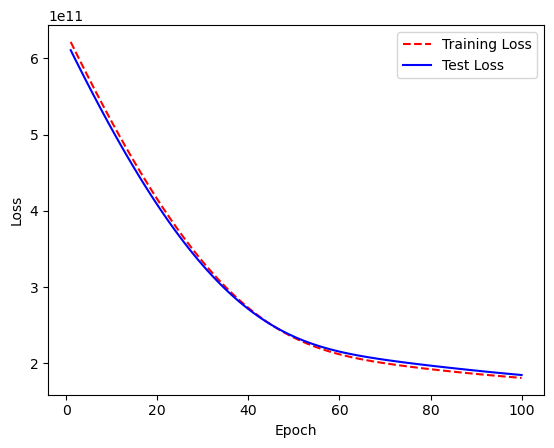

In [148]:
# Visualize loss history for the simple neural network
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

## Medium neural network

In [149]:
medium_nn = Sequential()
medium_nn.add(InputLayer((818,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('/tmp/ckpt/checkpoint.model.keras', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 903190544384.0000 - root_mean_squared_error: 929812.6875 - val_loss: 141236944896.0000 - val_root_mean_squared_error: 375997.1875
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 124218621952.0000 - root_mean_squared_error: 351857.3750 - val_loss: 125398876160.0000 - val_root_mean_squared_error: 354357.0938
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 113681047552.0000 - root_mean_squared_error: 336460.4375 - val_loss: 116372447232.0000 - val_root_mean_squared_error: 341417.8750
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 106807263232.0000 - root_mean_squared_error: 326097.3438 - val_loss: 108625805312.0000 - val_root_mean_squared_error: 329917.6250
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 100670816256.0000 - root_mean_squared_error: 316555.2812 - val_loss: 102182690816.0000 - val_root_mean_squared_error: 320036.4375
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━

In [150]:
medium_nn = load_model('/tmp/ckpt/checkpoint.model.keras')
mse(medium_nn.predict(X_train), y_train, squared=False), mse(medium_nn.predict(X_val), y_val, squared=False)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


(294185.518491572, 293312.1239026678)

In [151]:
history = medium_nn.fit(x=X_train,y=y_train, validation_data = (X_val,y_val),callbacks = [cp], batch_size = 32, epochs = 100, verbose = 1)
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)


Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 77804822528.0000 - root_mean_squared_error: 278277.9375 - val_loss: 85766938624.0000 - val_root_mean_squared_error: 293336.5312
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 77374529536.0000 - root_mean_squared_error: 277521.3750 - val_loss: 85846155264.0000 - val_root_mean_squared_error: 293472.5000
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 76995330048.0000 - root_mean_squared_error: 276849.9688 - val_loss: 85908021248.0000 - val_root_mean_squared_error: 293578.5625
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 76586098688.0000 - root_mean_squared_error: 276124.2188 - val_loss: 86005833728.0000 - val_root_mean_squared_error: 293745.4062
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 76134195200.0000 - root_mean_squared_error: 275314.7188 - val_loss: 86174334976.0000 - val_root_mean_squared_error: 294029.5938
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 707

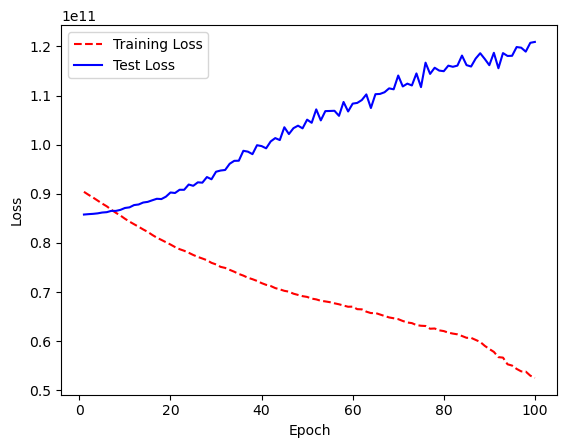

In [152]:
# Visualize loss history for the medium neural network
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

## Large Neural Network

In [153]:
large_nn = Sequential()
large_nn.add(InputLayer((818,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('/tmp/ckpt/checkpoint.model.keras', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 330063118336.0000 - root_mean_squared_error: 555799.7500 - val_loss: 137448439808.0000 - val_root_mean_squared_error: 371131.8750
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 128818053120.0000 - root_mean_squared_error: 358146.4375 - val_loss: 155315060736.0000 - val_root_mean_squared_error: 394453.4375
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 113000226816.0000 - root_mean_squared_error: 335786.0312 - val_loss: 82040438784.0000 - val_root_mean_squared_error: 286788.6250
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 85376688128.0000 - root_mean_squared_error: 291224.7812 - val_loss: 75709038592.0000 - val_root_mean_squared_error: 275395.7812
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 75196465152.0000 - root_mean_squared_error: 273402.7188 - val_loss: 71638507520.0000 - val_root_mean_squared_error: 267929.2188
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

In [154]:
large_nn = load_model('/tmp/ckpt/checkpoint.model.keras')
mse(large_nn.predict(X_train), y_train, squared=False), mse(large_nn.predict(X_val), y_val, squared=False)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step


(240594.6771277807, 266446.64886823954)

In [155]:
history = large_nn.fit(x=X_train,y=y_train, validation_data = (X_val,y_val),callbacks = [cp], batch_size = 32, epochs = 100, verbose = 1)
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60182953984.0000 - root_mean_squared_error: 244820.7969 - val_loss: 72503050240.0000 - val_root_mean_squared_error: 269500.3125
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56248946688.0000 - root_mean_squared_error: 236554.3594 - val_loss: 75055603712.0000 - val_root_mean_squared_error: 274154.5312
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 57550491648.0000 - root_mean_squared_error: 238855.4844 - val_loss: 87095672832.0000 - val_root_mean_squared_error: 295496.0625
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 54508470272.0000 - root_mean_squared_error: 233240.6719 - val_loss: 88485134336.0000 - val_root_mean_squared_error: 297851.4688
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 57863704576.0000 - root_mean_squared_error: 240244.4375 - val_loss: 78806097920.0000 - val_root_mean_squared_error: 280925.2188
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

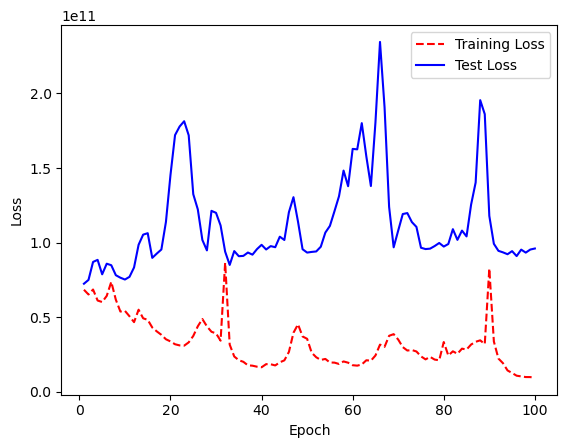

In [156]:
# Visualize loss history for the large neural network
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [157]:
mse(gbr.predict(X_test), y_test, squared=False)

272790.7130232794

### Methods to reduce overfitting refer to this link:

#### https://datascience.stackexchange.com/questions/65471/validation-loss-much-higher-than-training-loss

## Huge credit for these legends that helped me with this project.

#### Author: DanB (Melbourne Housing Snapshot)
#### NeuralNine: https://www.youtube.com/watch?v=Wqmtf9SA_kk&t=676s
#### Greg Hogg: https://www.youtube.com/watch?v=_-UCcuB8nbw